# ICR - Identifying Age-Related Conditions_EDA

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,RobustScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [2]:
#reading the dataset
train_df = pd.read_csv('/content/drive/MyDrive/ICR - Identifying Age-Related Conditions/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/ICR - Identifying Age-Related Conditions/test.csv')
greeks =  pd.read_csv('/content/drive/MyDrive/ICR - Identifying Age-Related Conditions/greeks.csv')

In [3]:
df = pd.merge(train_df,greeks,on='Id',how='left')

In [4]:
print('The shape of the data: ',df.shape)
print('-'*120)
df.head()

The shape of the data:  (617, 63)
------------------------------------------------------------------------------------------------------------------------


,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,GF,GH,GI,GL,Class,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,2003.810319,22.136229,69.834944,0.120343,1,B,C,G,D,3/19/2019
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,27981.562750,29.135430,32.131996,21.978000,0,A,C,M,B,Unknown
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,13676.957810,28.022851,35.192676,0.196941,0,A,C,M,B,Unknown
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,2094.262452,39.948656,90.493248,0.155829,0,A,C,M,B,Unknown
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8524.370502,45.381316,36.262628,0.096614,1,D,B,F,B,3/25/2020


In [5]:
# to know more about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 63 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       617 non-null    object 
 1   AB       617 non-null    float64
 2   AF       617 non-null    float64
 3   AH       617 non-null    float64
 4   AM       617 non-null    float64
 5   AR       617 non-null    float64
 6   AX       617 non-null    float64
 7   AY       617 non-null    float64
 8   AZ       617 non-null    float64
 9   BC       617 non-null    float64
 10  BD       617 non-null    float64
 11  BN       617 non-null    float64
 12  BP       617 non-null    float64
 13  BQ       557 non-null    float64
 14  BR       617 non-null    float64
 15  BZ       617 non-null    float64
 16  CB       615 non-null    float64
 17  CC       614 non-null    float64
 18  CD       617 non-null    float64
 19  CF       617 non-null    float64
 20  CH       617 non-null    float64
 21  CL       617 non

In [6]:
#checking the duplicacy in the data
df[df.duplicated()]

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,GF,GH,GI,GL,Class,Alpha,Beta,Gamma,Delta,Epsilon


In [7]:
#checking the missing values
df.isnull().sum()

Id         0
AB         0
AF         0
AH         0
AM         0
          ..
Alpha      0
Beta       0
Gamma      0
Delta      0
Epsilon    0
Length: 63, dtype: int64

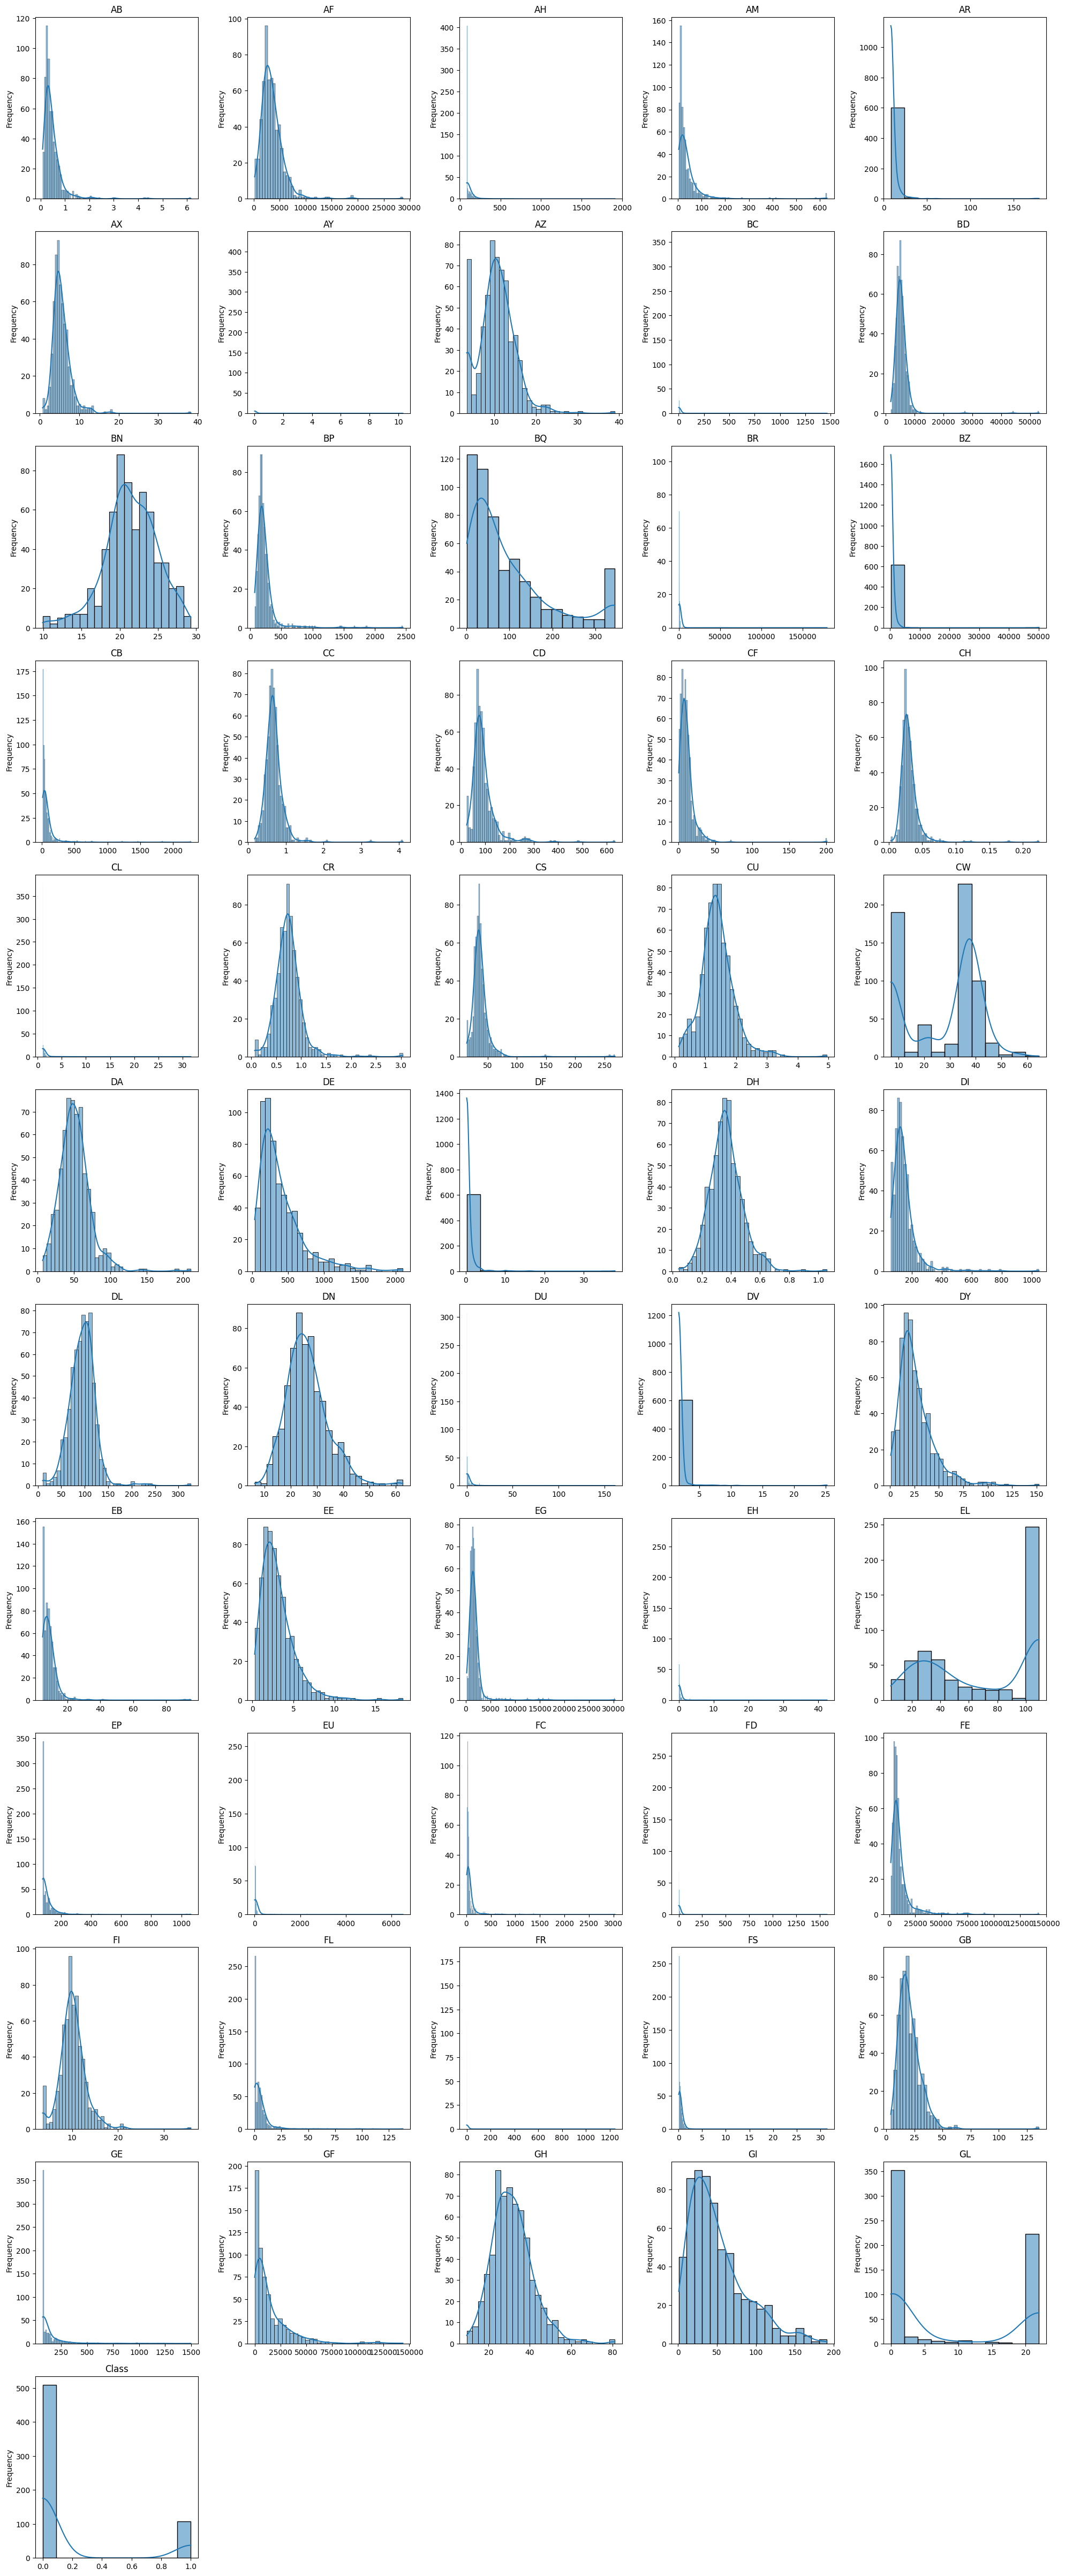

In [8]:
columns = [col for col in df.columns if df[col].dtypes == 'int64' or df[col].dtypes == 'float64']
# Set the number of rows and columns for the subplot grid
num_rows = len(columns) // 4 + int(len(columns) % 4 != 0)
num_cols = 5

# Create a new figure and set the size
plt.figure(figsize=(20, 4*num_rows))

# Loop through each column and create a distribution plot in a new subplot
for i, col in enumerate(columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust the spacing between subplots to avoid overlapping
plt.show()

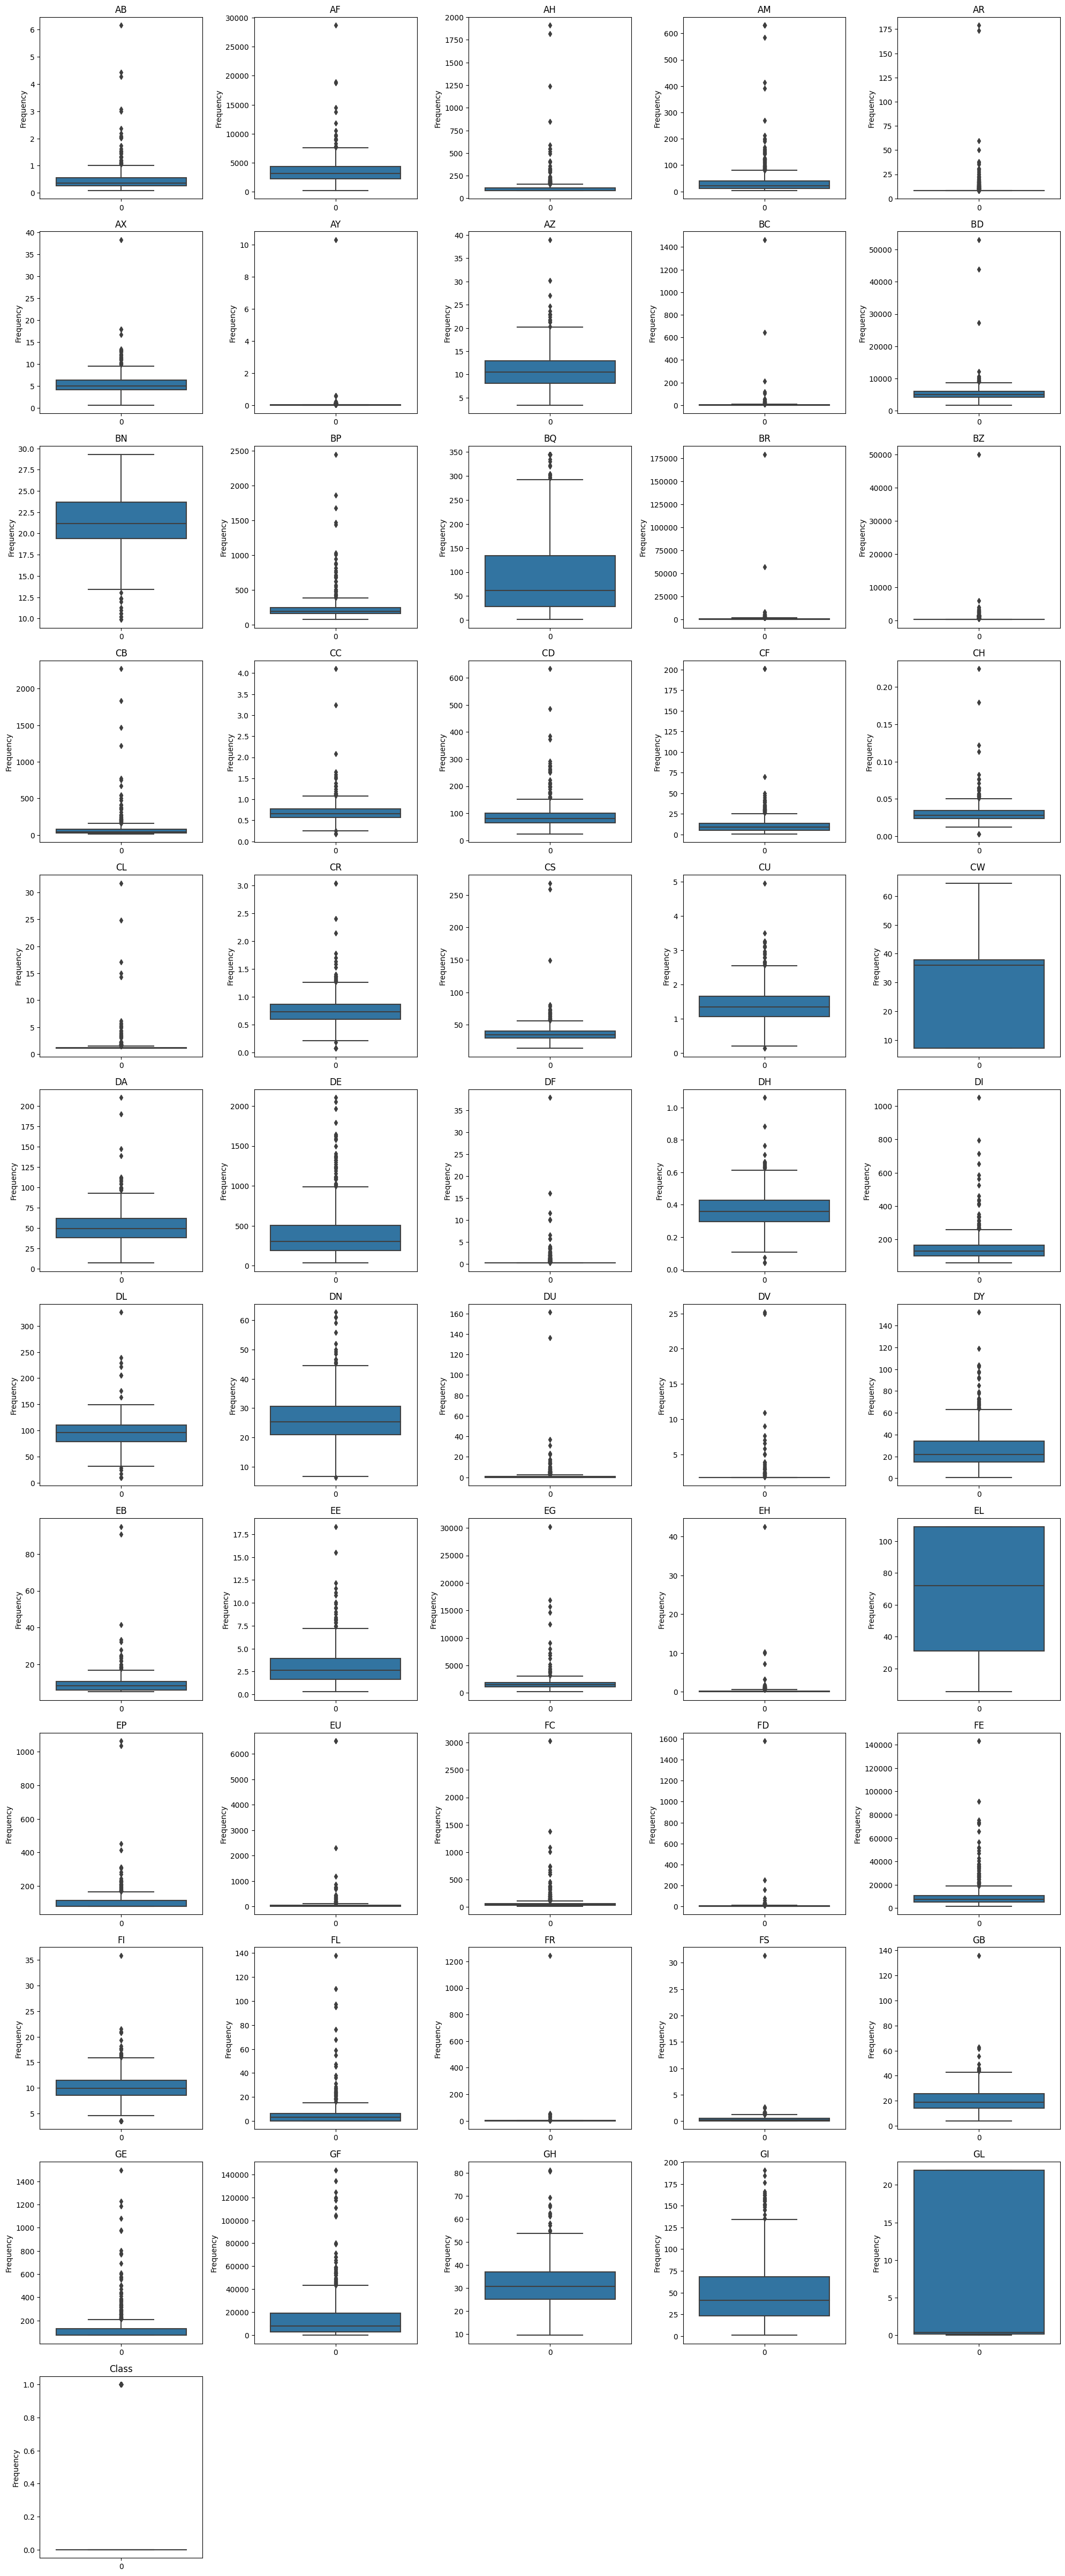

In [9]:
columns = [col for col in df.columns if df[col].dtypes == 'int64' or df[col].dtypes == 'float64']
# Set the number of rows and columns for the subplot grid
num_rows = len(columns) // 4 + int(len(columns) % 4 != 0)
num_cols = 5

# Create a new figure and set the size
plt.figure(figsize=(20, 4*num_rows))

# Loop through each column and create a distribution plot in a new subplot
for i, col in enumerate(columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(df[col])
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust the spacing between subplots to avoid overlapping
plt.show()

In [10]:
#replacing unknow to nan
df[df['Epsilon'] == 'Unknown'] = np.nan

In [11]:
#imputing missing values with median
columns = [col for col in df.columns if df[col].dtypes != 'object']
imputer = SimpleImputer(strategy='median')
imputer.fit(df[columns])
df[columns] = pd.DataFrame(imputer.transform(df[columns]),columns=columns)

In [12]:
#imputing missing values with mode
columns = [col for col in df.columns if df[col].dtypes == 'object']
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(df[columns])
df[columns] = pd.DataFrame(imputer.transform(df[columns]),columns=columns)

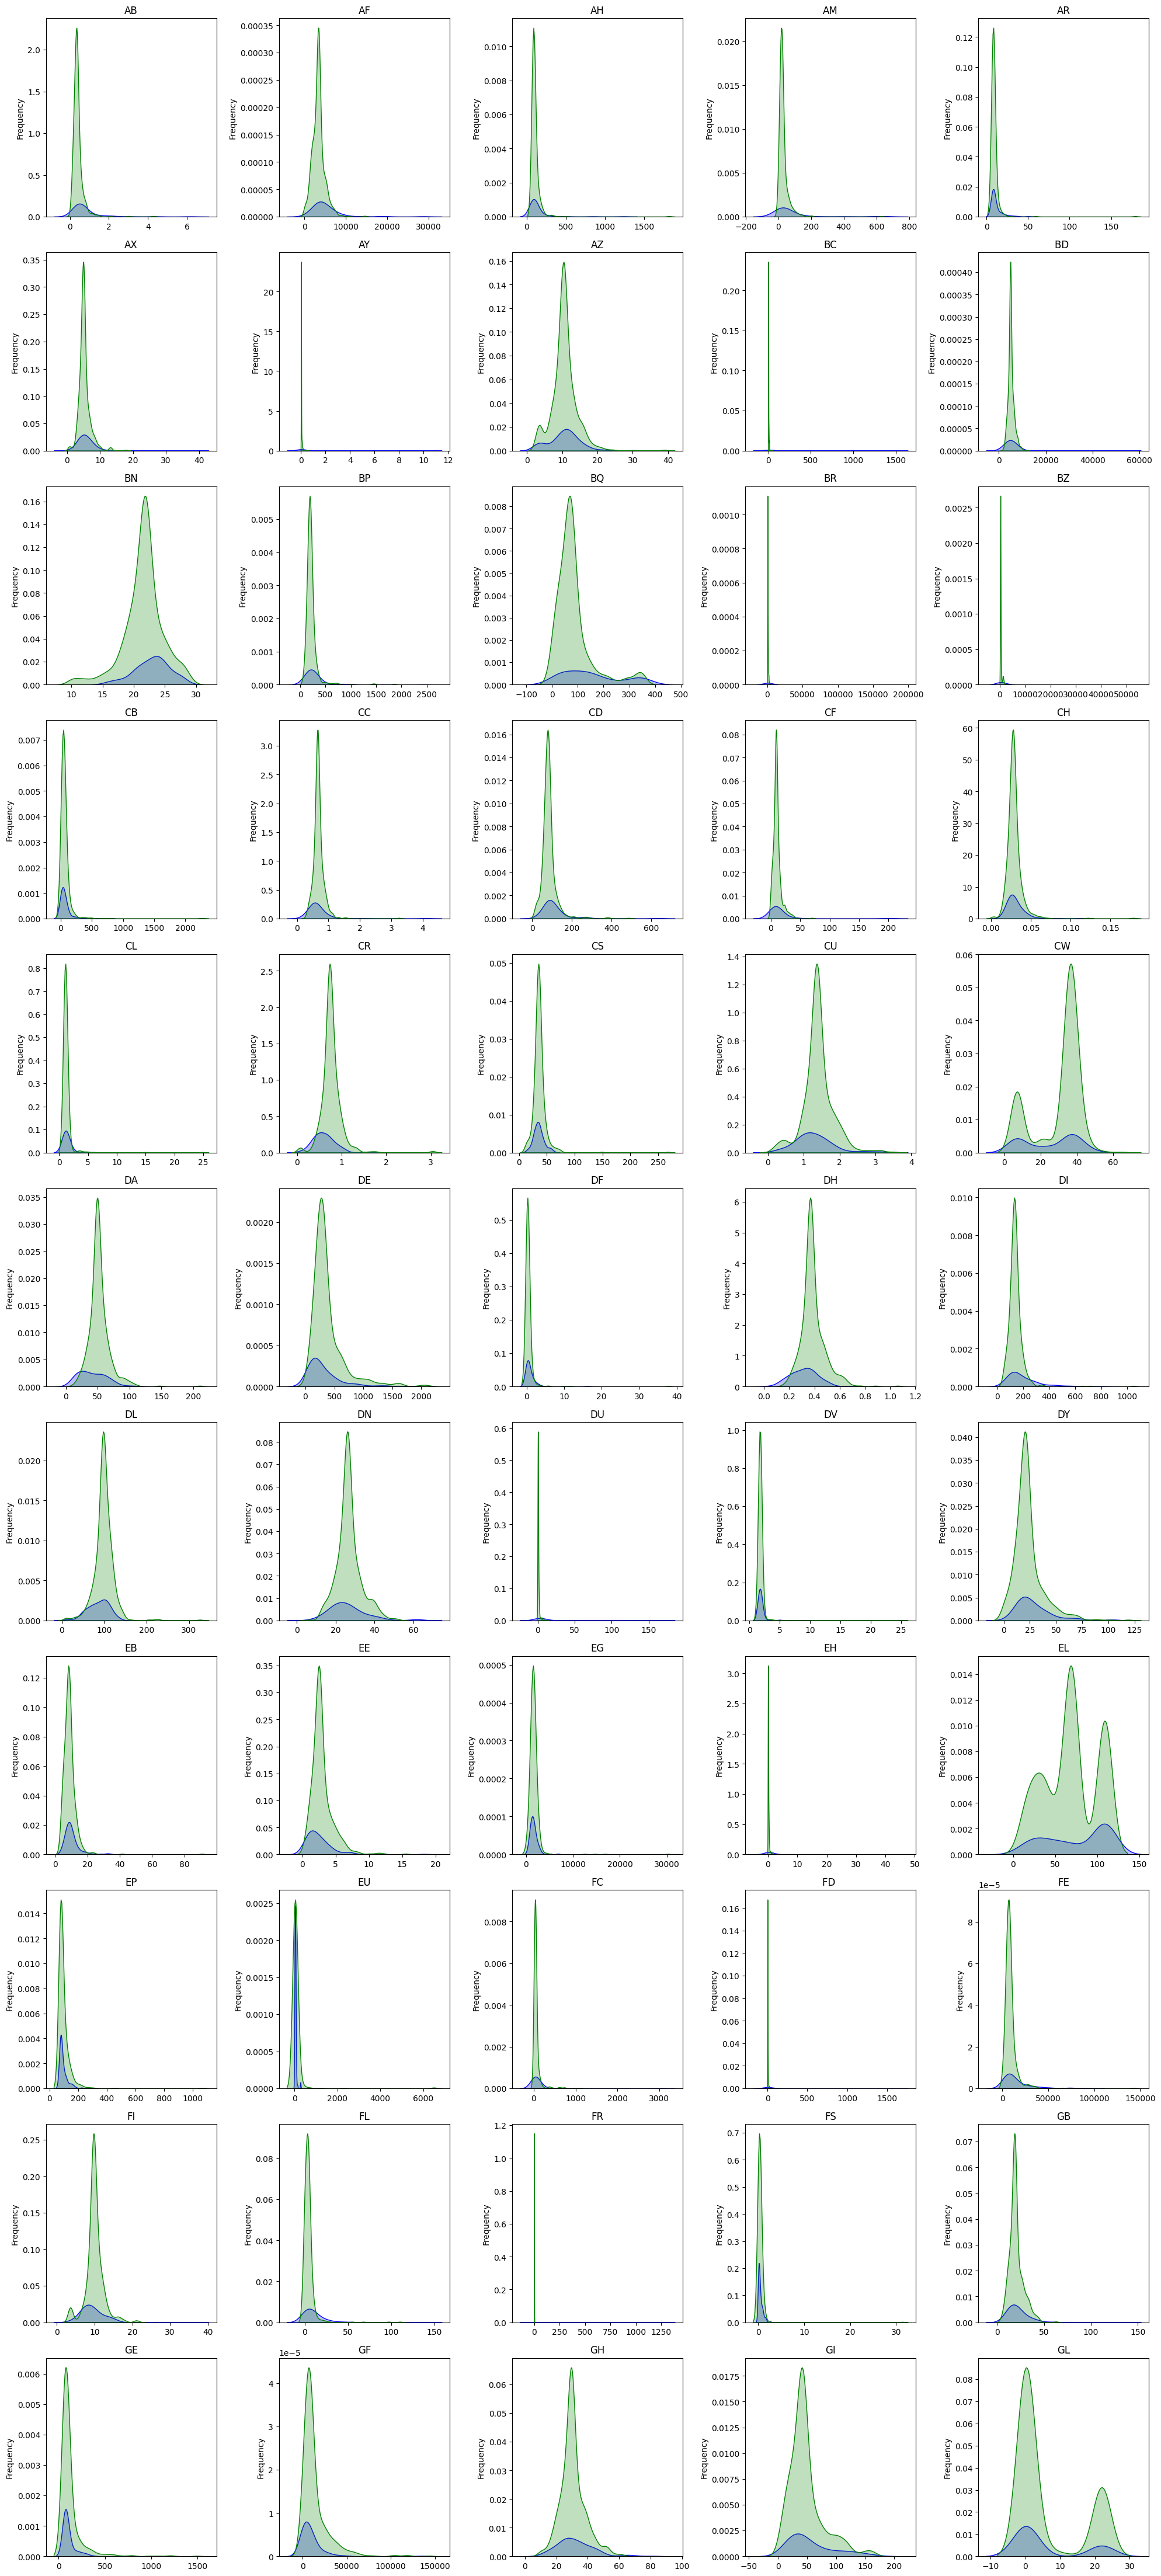

In [13]:
columns = [col for col in df.columns if df[col].dtypes == 'int64' or df[col].dtypes == 'float64' and col != 'Class']
# Set the number of rows and columns for the subplot grid
num_rows = len(columns) // 4 + int(len(columns) % 4 != 0)
num_cols = 5

# Create a new figure and set the size
plt.figure(figsize=(20, 4*num_rows))

# Loop through each column and create a distribution plot in a new subplot
for i, col in enumerate(columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.kdeplot(x=col,hue='Class',fill=True,legend=False, palette=['green', 'blue'],data=df)
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust the spacing between subplots to avoid overlapping
plt.show()

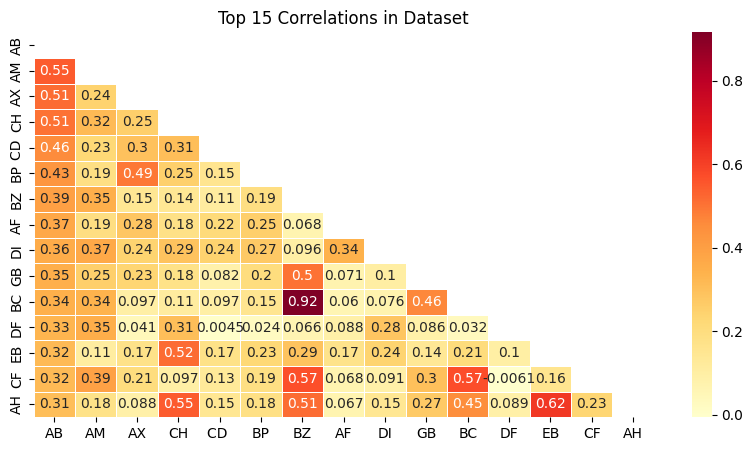

In [14]:
def plot_top_correlations(df: pd.core.frame.DataFrame, n: int, title_name: str='Top Correlations') -> None:
    # Calculate correlation between all variables
    corr = df.corr()

    # Select variables having highest absolute correlation
    top_corr_cols = corr.abs().nlargest(n, columns=corr.columns).index
    top_corr = corr.loc[top_corr_cols, top_corr_cols]

    fig, axes = plt.subplots(figsize=(10, 5))
    mask = np.zeros_like(top_corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(top_corr, mask=mask, linewidths=.5, cmap='YlOrRd', annot=True)
    plt.title(title_name)
    plt.show()

# Plot heatmap of top 15 correlations in training data
plot_top_correlations(df[columns], 15, 'Top 15 Correlations in Dataset')

In [15]:
#applyin log transformation
for i in df.columns:
    if (df[i].dtypes == 'float64') and i!='Class':
        df[i] = np.log(df[i])


In [16]:
# Define the z-score threshold for outlier detection
z_threshold = 3

col_with_out = [col for col in df.columns if (df[col].dtypes == 'float64' and col not in ['GL','CW','EL'])]

# Calculate z-scores for each column in the DataFrame
z_scores = np.abs((df[col_with_out] - df[col_with_out].mean()) / df[col_with_out].std())

# Create a Boolean mask where True indicates an outlier
outlier_mask = z_scores > z_threshold

# Remove rows containing outliers
df = df[~outlier_mask.any(axis=1)]

In [17]:
#One hot encoding
encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtypes == 'object':
        df[col] = encoder.fit_transform(df[col])

In [18]:
x = df.drop(columns=['Class','Id'])
print(x)

           AB        AF        AH        AM        AR        AX        AY  \
1   -1.012788  8.121118  4.445003  3.020680  2.096629  1.608733 -3.666023   
2   -1.012788  8.121118  4.445003  3.020680  2.096629  1.608733 -3.666023   
3   -1.012788  8.121118  4.445003  3.020680  2.096629  1.608733 -3.666023   
7   -1.312304  6.873635  4.445003  3.052783  2.096629  1.606958 -3.666023   
8   -1.060990  8.082846  4.445003  3.363455  2.096629  1.391776 -3.666023   
..        ...       ...       ...       ...       ...       ...       ...   
609 -1.001092  8.403263  4.445003  3.252037  2.096629  1.746025 -3.433400   
611 -1.741867  7.866058  4.445003  1.955486  2.096629  1.393976 -3.666023   
612 -1.900091  8.048807  4.818373  2.252763  2.566552  1.252564 -2.559505   
615 -1.012788  7.141669  4.445003  3.164878  2.096629  2.077184 -3.666023   
616 -1.012788  8.121118  4.445003  3.020680  2.096629  1.608733 -3.666023   

           AZ        BC       BD   ...        GE        GF        GH  \
1  

In [19]:
y = df['Class']
print(y)

1      0.0
2      0.0
3      0.0
7      0.0
8      0.0
      ... 
609    0.0
611    0.0
612    0.0
615    0.0
616    0.0
Name: Class, Length: 384, dtype: float64


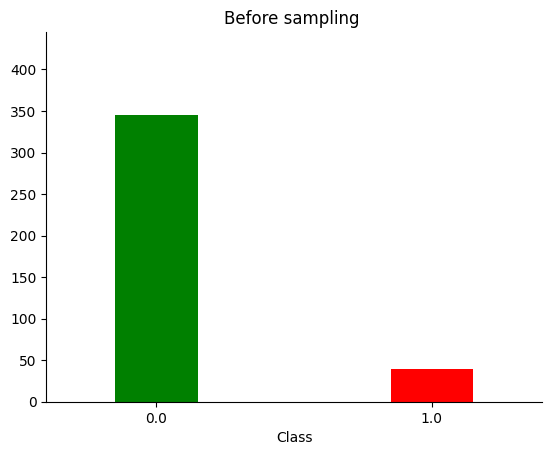

In [20]:
df['Class'].value_counts().plot(kind='bar',alpha=1,color=['green','red'],width=0.3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['right'].set_visible(False)
plt.xticks(rotation=0, ha='center')
plt.ylim(0,df['Class'].value_counts().max()+100)
plt.title('Before sampling ')

plt.show()

In [21]:
# Oversampling
ros = RandomOverSampler(random_state=42)
ros.fit(x,y)
x_resampled, y_resampled  = ros.fit_resample(x,y)
resampled_df = pd.concat([pd.DataFrame(x_resampled, columns=x.columns), pd.Series(y_resampled, name='Class')], axis=1)

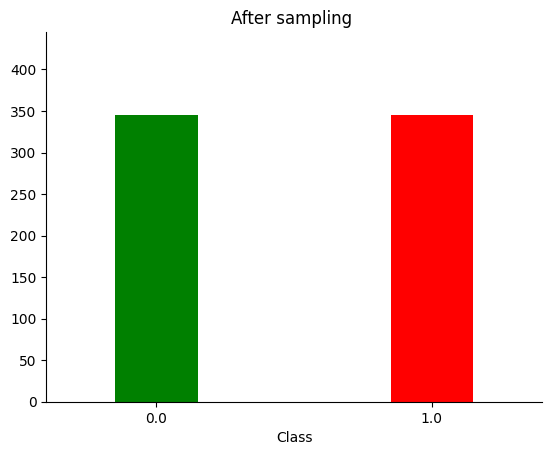

In [22]:
resampled_df['Class'].value_counts().plot(kind='bar',alpha=1,color=['green','red'],width=0.3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['right'].set_visible(False)
plt.xticks(rotation=0, ha='center')
plt.ylim(0,resampled_df['Class'].value_counts().max()+100)
plt.title('After sampling ')

plt.show()

In [23]:
x = resampled_df.drop(columns=['Class'])
y = resampled_df['Class']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(517, 61) (173, 61) (517,) (173,)


In [25]:
#scaling the data

scaler = RobustScaler()

# Fit the scaler on the training data
scaler.fit(x_train)

# Transform the training and testing data
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)